In [1]:
import os, tqdm
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import rc
rc('font', size=14)
rc('font', family='Arial')
# rc('font', serif='Times')
rc('pdf', fonttype=42)
# rc('text', usetex=True)

In [2]:
data_location = 'local'

if data_location=='server':
    folder = os.path.join("Y:",os.sep,"Nicola_Gritti","analysis_code","scRNAseq_Gastruloids","new_codes",'results','integration','diff_expr')
elif data_location=='hdd':
    folder = os.path.join("F:",os.sep,"scrnaseq_gastruloids",'results','integration','diff_expr')
elif data_location == 'local':
    folder = os.path.join('C:',os.sep,'Users','nicol','OneDrive','Desktop','scrnaseq_gastruloids','results','integration','diff_expr')


In [4]:
markers = pd.read_csv(os.path.join(folder,'markersDiff_epi_pluri.csv'))
markers = markers.rename(columns={'Unnamed: 0': 'geneName'})
epi_high = list(markers.geneName[1:51])
gastr_high = list(markers.geneName[-50:])[::-1]


In [5]:
expression_matrix = pd.read_csv(os.path.join(folder,'expression_markersDiff_epi_pluri.csv'))
expression_matrix = expression_matrix.rename(columns={'Unnamed: 0': 'geneName'})


In [6]:
exp_epi_high = expression_matrix[expression_matrix.geneName.isin(epi_high)]
exp_epi_high = exp_epi_high.reset_index()
exp_epi_high = exp_epi_high.drop(['index'], axis=1)
df_epi_high = exp_epi_high.set_index('geneName').stack().reset_index(name='expression').rename(columns={'level_1':'cellName'})
df_epi_high.geneName = [i[:10] for i in df_epi_high.geneName]

exp_gastr_high = expression_matrix[expression_matrix.geneName.isin(gastr_high)]
exp_gastr_high = exp_gastr_high.reset_index()
exp_gastr_high = exp_gastr_high.drop(['index'], axis=1)
df_gastr_high = exp_gastr_high.set_index('geneName').stack().reset_index(name='expression').rename(columns={'level_1':'cellName'})
df_gastr_high.geneName = [i[:10] for i in df_gastr_high.geneName]


In [7]:
cellFate = []
for i in tqdm.tqdm(df_epi_high.cellName):
    if 'cell_' in i:
        cellFate.append('Epiblast')
    else:
        cellFate.append('GPluripotent')
df_epi_high['cellFate'] = cellFate

cellFate = []
for i in tqdm.tqdm(df_gastr_high.cellName):
    if 'cell_' in i:
        cellFate.append('Epiblast')
    else:
        cellFate.append('GPluripotent')
df_gastr_high['cellFate'] = cellFate


100%|███████████████████████████████████████████████████████████████████| 1055750/1055750 [00:00<00:00, 2369117.49it/s]


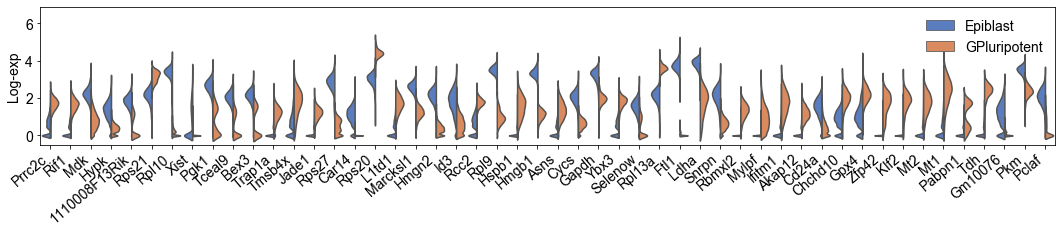

In [10]:
###

fig,ax=plt.subplots(figsize=(15,3))
fig.subplots_adjust(left=0.05, right=0.99, top=0.99, bottom=0.35)
sns.violinplot(x="geneName", y="expression", hue="cellFate",
               data=df_epi_high, palette="muted", split=True, ax=ax,
               inner=None, scale='width', scale_hue=False)
ax.set_xticklabels(epi_high, rotation=40, ha='right')
ax.set_ylim(-0.5,6.9)
ax.set_ylabel('Log-exp')
ax.set_xlabel('')
plt.legend(loc='upper right', frameon=False)
fig.savefig(os.path.join(folder,'epiblast_high_TOP50.pdf'))


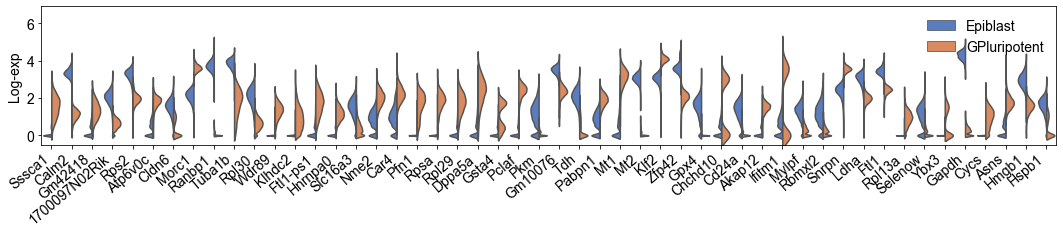

In [11]:
###

fig,ax=plt.subplots(figsize=(15,3))
fig.subplots_adjust(left=0.05, right=0.99, top=0.99, bottom=0.35)
g = sns.violinplot(x="geneName", y="expression", hue="cellFate",
               data=df_gastr_high, palette="muted", split=True, ax=ax,
               inner=None, scale='width', scale_hue=True)
ax.set_xticklabels(gastr_high, rotation=40, ha='right')
ax.set_ylim(-0.5,6.9)
ax.set_ylabel('Log-exp')
ax.set_xlabel('')
plt.legend(loc='upper right', frameon=False)
fig.savefig(os.path.join(folder,'gastruloidsPluripotent_high_TOP50.pdf'))


In [ ]:
ax.get_xticklabels()[0].get_text()